In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Handling Missing data

#### Percentage of null values in director , cast and country are higher than others.
#### So , replace null values in these columns with NA and others with mode

In [4]:
df.fillna({'director':'NA', 'cast':'NA','country':'NA'}, inplace=True)

In [5]:
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [6]:
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [7]:
df['duration'].fillna(df['duration'].mode()[0], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

#### Three ratings contain durations, they should be transfered to related column and replaced with mode

In [10]:
df.loc[df['rating'].str.contains('min'),'duration']=df.loc[df['rating'].str.contains('min'),'rating']
df.loc[df.rating.str.contains('min'), 'rating'] = df.rating.mode()[0]

In [11]:
df['rating'].value_counts()

TV-MA       3214
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

## Lets add columns for day month and year

In [12]:
df.date_added = pd.to_datetime(df.date_added)
df['year_added'] = df.date_added.dt.year
df['month_added'] = df.date_added.dt.month_name()
df['day_added'] = df.date_added.dt.day_name()

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Saturday
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Friday
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Friday
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Friday


# Cleaning end , let's start analysis and visualization

## Ratio of movies to TV  shows

C:\Users\mazen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

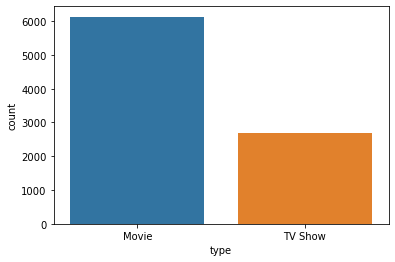

In [14]:
sns.countplot(df['type'])

## Movies much more than TV shows

## Question 2 : What tv shows released after 2019

In [15]:
df2=df[df['type']=='TV Show']
df3=df2[df2['release_year']>=2019]
df3['title']

1                                   Blood & Water
2                                       Ganglands
3                           Jailbirds New Orleans
4                                    Kota Factory
5                                   Midnight Mass
                          ...                    
8125                                  Super Wings
8132    Surviving R. Kelly Part II: The Reckoning
8173                                    Thackeray
8376                         The Kindness Diaries
8437                       The Netflix Afterparty
Name: title, Length: 1148, dtype: object

## Question 3 : Movies or shows which have Robert De Niro in cast

In [94]:
df[df['cast'].str.contains('Robert De Niro')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,genere
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",2021-09-01,1984,R,229 min,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,2021,September,Wednesday,Classic Movies
579,s580,Movie,Midnight Run,Martin Brest,"Robert De Niro, Charles Grodin, Yaphet Kotto, ...",United States,2021-07-01,1988,R,126 min,"Action & Adventure, Classic Movies, Comedies",A cop-turned-bounty hunter runs into trouble a...,2021,July,Thursday,Action & Adventure
702,s703,Movie,Silver Linings Playbook,David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",United States,2021-06-17,2012,R,122 min,"Comedies, Dramas, Independent Movies",A man with bipolar disorder moves home with hi...,2021,June,Thursday,Comedies
2314,s2315,Movie,Stardust,Matthew Vaughn,"Claire Danes, Michelle Pfeiffer, Robert De Nir...","United Kingdom, United States",2020-07-01,2007,PG-13,128 min,"Action & Adventure, International Movies, Roma...","To win his true love's heart, wide-eyed Trista...",2020,July,Wednesday,Action & Adventure
3181,s3182,Movie,The Irishman: In Conversation,NA,"Martin Scorsese, Robert De Niro, Al Pacino, Jo...",United States,2019-12-05,2019,TV-MA,24 min,Documentaries,Join director Martin Scorsese as he sits down ...,2019,December,Thursday,Documentaries
3227,s3228,Movie,The Irishman,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,2019-11-27,2019,R,209 min,Dramas,Hit man Frank Sheeran looks back at the secret...,2019,November,Wednesday,Dramas
6880,s6881,Movie,GoodFellas,Martin Scorsese,"Robert De Niro, Ray Liotta, Joe Pesci, Lorrain...",United States,2021-01-01,1990,R,145 min,"Classic Movies, Dramas",Former mobster Henry Hill recounts his colorfu...,2021,January,Friday,Classic Movies
7113,s7114,Movie,Jackie Brown,Quentin Tarantino,"Pam Grier, Samuel L. Jackson, Robert Forster, ...",United States,2019-08-01,1997,R,154 min,"Dramas, Thrillers",When an aging flight attendant's caught smuggl...,2019,August,Thursday,Dramas
7431,s7432,Movie,Mean Streets,Martin Scorsese,"Robert De Niro, Harvey Keitel, David Proval, A...",United States,2019-07-01,1973,R,112 min,"Classic Movies, Dramas, Independent Movies","In New York's Little Italy, a low-level hoodlu...",2019,July,Monday,Classic Movies
7820,s7821,Movie,Raging Bull,Martin Scorsese,"Robert De Niro, Cathy Moriarty, Joe Pesci, Fra...",United States,2019-10-01,1980,R,129 min,"Classic Movies, Dramas, Sports Movies",This gritty biopic of brutal boxer Jake LaMott...,2019,October,Tuesday,Classic Movies


In [17]:
df.info()
#df.groupby('year_added')['type'].value_counts().reset_index()
#sns.kdeplot(x ='year_added',y ='type',hue='type', data= df, shade= False).set(xlabel = 'Age', title= 'Distribution of age')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int64         
 13  month_added   8807 non-null   object        
 14  day_added     8807 non-null   object        
dtypes: datetime64[ns](1), int64(2), object

## Question 4: which country has most contribution?

C:\Users\mazen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'NA'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Mexico'),
  Text(10, 0, 'Egypt')])

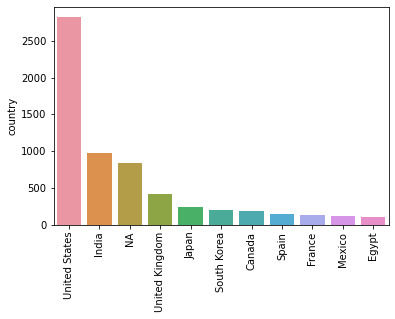

In [85]:
p=df['country'].value_counts()[:11]
sns.barplot(p.index,p)
plt.xticks(rotation= 90)

##  Question 5: Which country has most contribution in TV shows in 2019

C:\Users\mazen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'NA'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'India'),
  Text(6, 0, 'China'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Mexico'),
  Text(10, 0, 'Australia')])

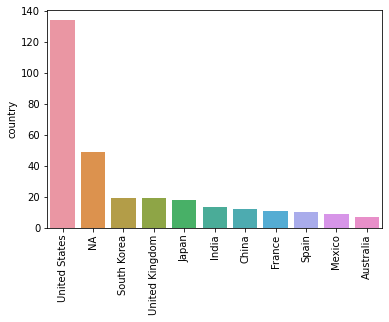

In [63]:
df2=df[['type','country','release_year']]
df3=df2[(df2['type']=='TV Show') & (df2['release_year']==2019)]
p2=df3['country'].value_counts()[:11]
sns.barplot(p2.index,p2)
plt.xticks(rotation= 90)

## Question 6 : Amount of content added each year

<AxesSubplot:xlabel='year_added'>

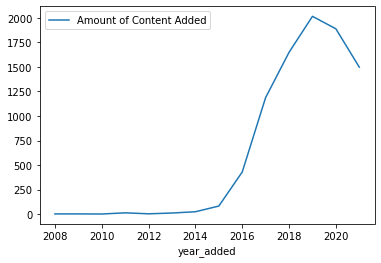

In [66]:
ddf=df[['year_added','title']].groupby('year_added').count()
ddf=ddf.rename(columns={'title': 'Amount of Content Added'})
ddf.plot()

#### 2019 was rich of content

## Question 7 : What is the top genere?

In [68]:
#First , add genere column
df['genere'] = df['listed_in'].map(lambda x: x.split(',')[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,genere
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Saturday,Documentaries
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Friday,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Friday,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Friday,Docuseries
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Friday,International TV Shows


### 1- Top genere for TV shows

C:\Users\mazen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'International TV Shows'),
  Text(1, 0, 'Crime TV Shows'),
  Text(2, 0, "Kids' TV"),
  Text(3, 0, 'British TV Shows'),
  Text(4, 0, 'Docuseries'),
  Text(5, 0, 'Anime Series'),
  Text(6, 0, 'TV Comedies'),
  Text(7, 0, 'Reality TV'),
  Text(8, 0, 'TV Dramas'),
  Text(9, 0, 'TV Action & Adventure'),
  Text(10, 0, 'Stand-Up Comedy & Talk Shows'),
  Text(11, 0, 'Romantic TV Shows'),
  Text(12, 0, 'Classic & Cult TV'),
  Text(13, 0, 'TV Shows'),
  Text(14, 0, 'TV Horror'),
  Text(15, 0, 'Spanish-Language TV Shows'),
  Text(16, 0, 'TV Sci-Fi & Fantasy')])

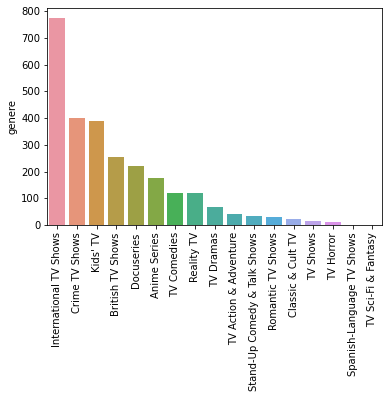

In [87]:
tvShows=df[df['type']=='TV Show']
p3=tvShows['genere'].value_counts()
sns.barplot(p3.index,p3)
plt.xticks(rotation= 90)

### 2- Top Movies

C:\Users\mazen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dramas'),
  Text(1, 0, 'Comedies'),
  Text(2, 0, 'Action & Adventure'),
  Text(3, 0, 'Documentaries'),
  Text(4, 0, 'Children & Family Movies'),
  Text(5, 0, 'Stand-Up Comedy'),
  Text(6, 0, 'Horror Movies'),
  Text(7, 0, 'International Movies'),
  Text(8, 0, 'Classic Movies'),
  Text(9, 0, 'Thrillers'),
  Text(10, 0, 'Movies'),
  Text(11, 0, 'Anime Features'),
  Text(12, 0, 'Independent Movies'),
  Text(13, 0, 'Music & Musicals'),
  Text(14, 0, 'Sci-Fi & Fantasy'),
  Text(15, 0, 'Cult Movies'),
  Text(16, 0, 'Romantic Movies'),
  Text(17, 0, 'LGBTQ Movies'),
  Text(18, 0, 'Sports Movies')])

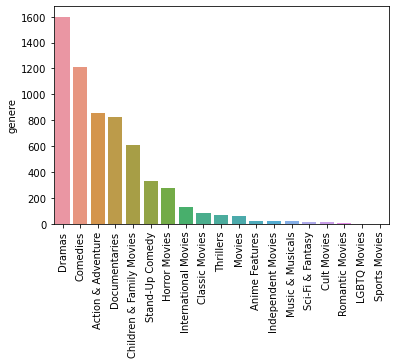

In [89]:
movieShows=df[df['type']=='Movie']
p4=movieShows['genere'].value_counts()
sns.barplot(p4.index,p4)
plt.xticks(rotation= 90)